In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import gpitch
import time
from gpitch.myplots import plotgp

In [3]:
pitches = [60, 64, 67]
instl = ['011PFNOM', '131EGLPM', '311CLNOM']
m = gpitch.separation.SoSp(gpu="3", pitches=pitches, instrument=instl[0], frames=14*16000)

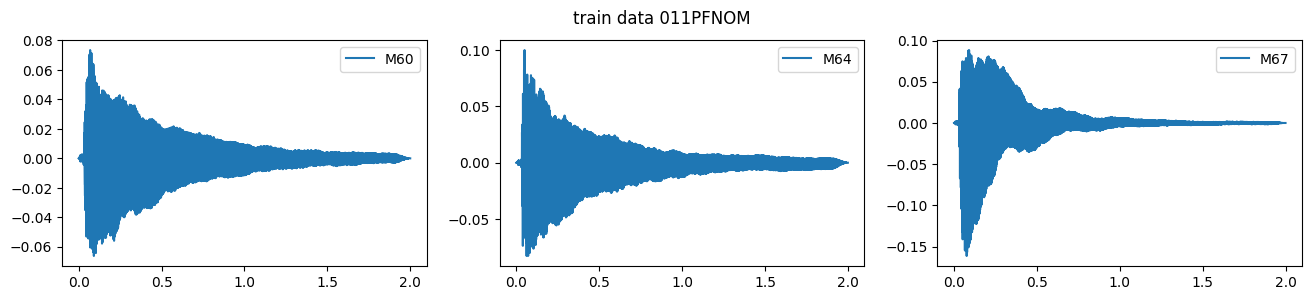

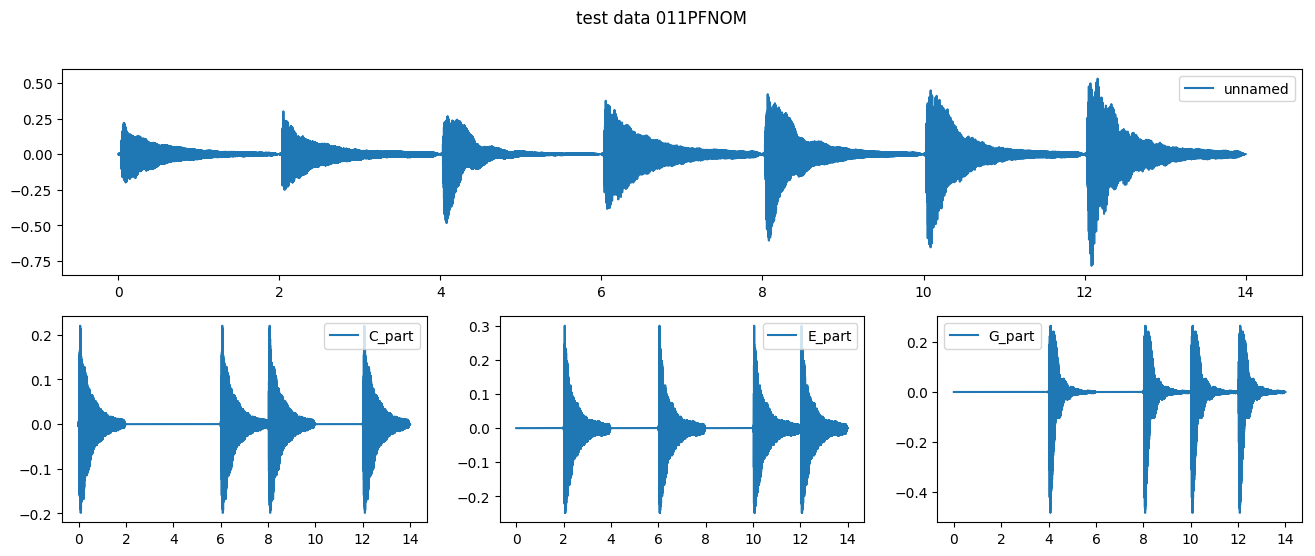

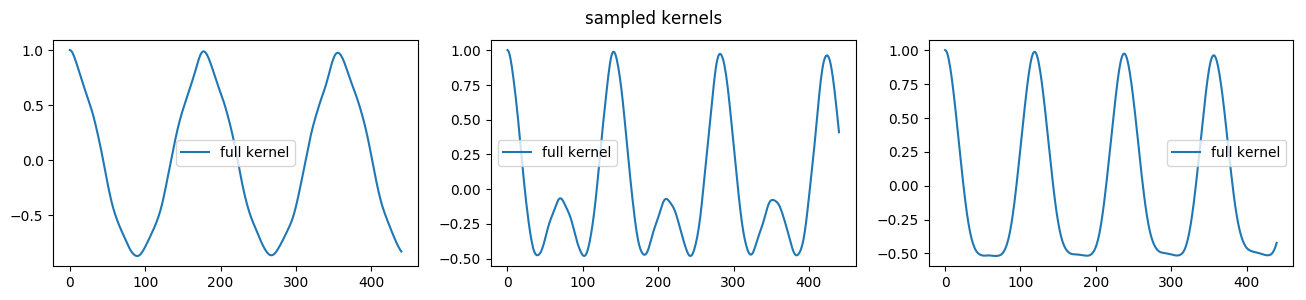

In [4]:
m.plot_traindata()
m.plot_testdata()
m.plot_kernel()

In [5]:
#m.model

In [6]:
# m.test_data.x.shape

In [7]:
start_time = time.time()
m.optimize()
print time.time() - start_time

254.187031984


In [8]:
m.predict_s()

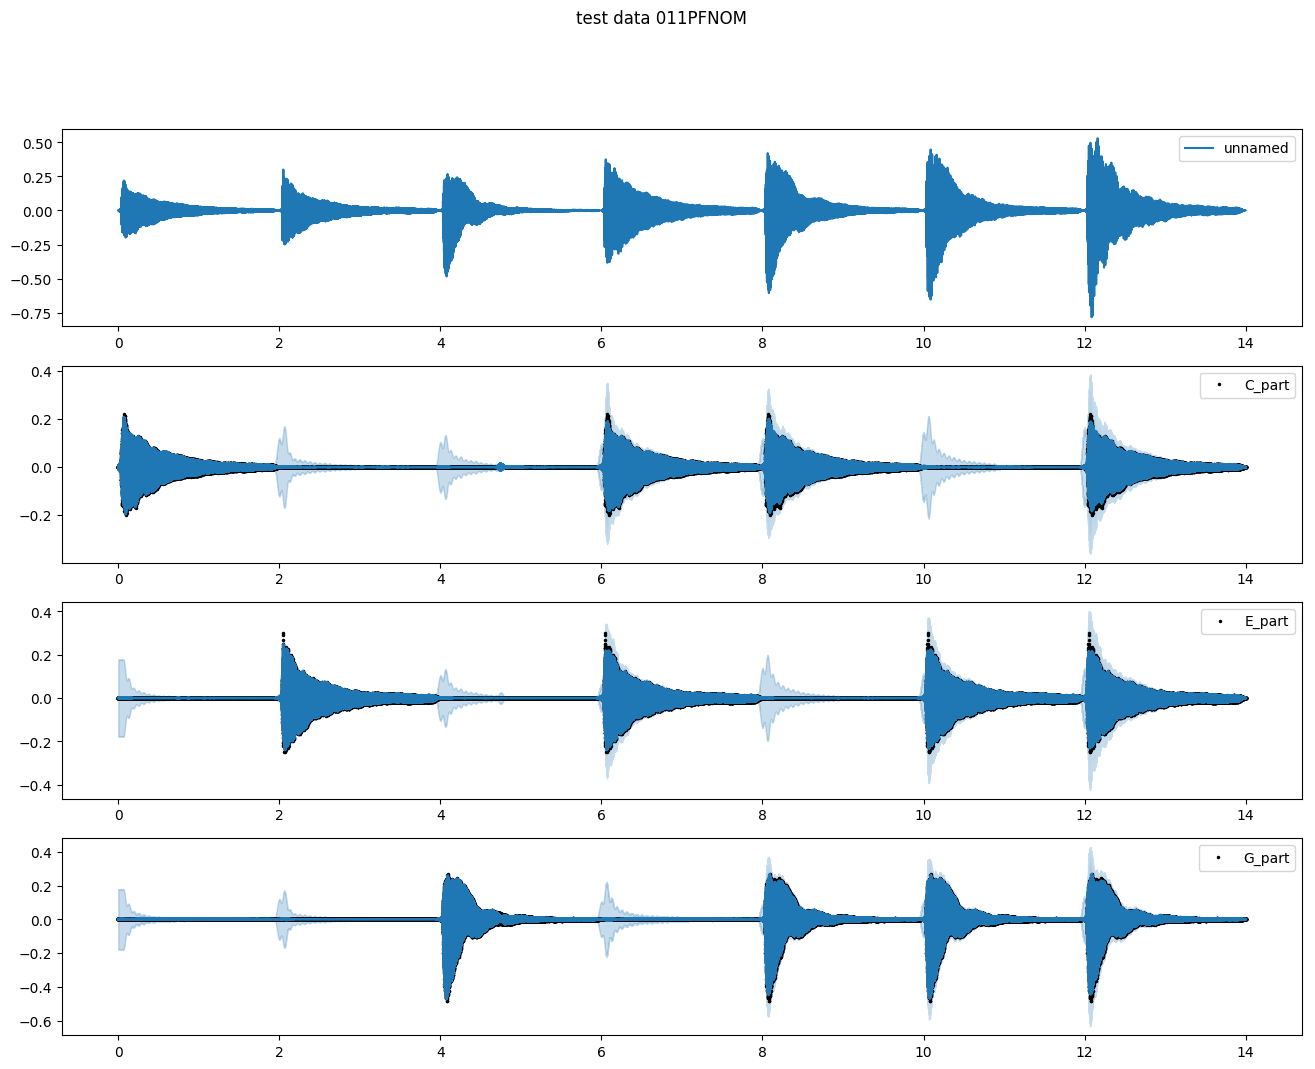

In [9]:
m.plot_results()
m.save_results()

In [10]:
# m.model

In [11]:
# m.params

In [12]:
m.compute_rmse()

0.0038588032850005948

In [13]:
import numpy as np
width = 2*6.771654
height = 0.25*width

plt.rc('xtick', labelsize='18')
plt.rc('ytick', labelsize='18')
plt.rc('axes', linewidth=2)
plt.rc('font', family='times', serif='Times')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


def plot_zoom_in(model, figsize=(width, height), source=1, width="30%", height="30%", loc=4,
                 limits=(8.10, 8.107, -0.47, 0.32), loc_mark=(2, 4),
                 bbox_to_anchor=(0.5, 0, 1, 1), legend=True, plot_zoom_in=True, source_number='1', ylim=[-1, 1]):

    fontsize = 22
    fig, ax = plt.subplots(figsize=figsize)  # create a new figure with a default 111 subplot
    ax.plotgp = plotgp
    ax.plotgp(x=model.real_src[source].x,
              y=model.real_src[source].y,
              xnew=model.test_data.x,
              mean=model.esource[source][0],
              variance=model.esource[source][1],
              beta1=1, beta2=1)
    
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)

#     ax.set_xlabel('Time (s)', fontsize=fontsize)
#     ax.set_ylabel('Amplitude', fontsize=fontsize)
    plt.xlim(0.0, 14.0)
    plt.ylim(ylim)
    #plt.ylim(-1., 1.)
    #plt.tight_layout()
    #plt.setp([ax.get_xticklabels()], visible=False)
    
    if legend:
        plt.legend(['True source ' + source_number, 'GP estimate', 'Uncertainty'], fontsize=fontsize, loc=3, ncol=3, 
                   bbox_to_anchor=(-0.01, -0.026, 1., .102), borderaxespad=0., frameon=False)

    if plot_zoom_in:
        # create inside segment
        # zoom_in = inset_axes(ax, width=width, height=height, loc=loc)
        zoom_in = inset_axes(ax, width=width, height=height, loc=loc, bbox_to_anchor=bbox_to_anchor,
                             bbox_transform=ax.transAxes)
        zoom_in.plotgp = plotgp

        # plot in segment
        zoom_in.plotgp(x=model.real_src[source].x,
                       y=model.real_src[source].y,
                       xnew=model.test_data.x,
                       mean=model.esource[source][0],
                       variance=model.esource[source][1])

        x1, x2, y1, y2 = limits  # specify the limits
        zoom_in.set_xlim(x1, x2)  # apply the x-limits
        zoom_in.set_ylim(y1, y2)  # apply the y-limits
        plt.yticks([])  # turn off ticks in segment
        plt.xticks([])  #
        mark_inset(ax, zoom_in, loc1=loc_mark[0], loc2=loc_mark[1], fc="none", ec="0.4")  # put zoom in marks


def plotgp(x, y, xnew, mean, variance, beta1=1, beta2=1):
    """
    Plot gaussian process

    """
    plt.plot(x[::beta1], y[::beta1], '.k', ms=5, mew=1)
    plt.plot(xnew[::beta1], mean[::beta1], 'C0', lw=2)
    upper = mean[::beta2][:, 0] + 2*np.sqrt(variance[::beta2][:, 0])
    lower = mean[::beta2][:, 0] - 2*np.sqrt(variance[::beta2][:, 0])
    plt.fill_between(xnew[::beta2][:, 0],
                     lower,
                     upper,
                     color='C0', alpha=0.25)

/homes/paad3/.local/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/homes/paad3/.local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


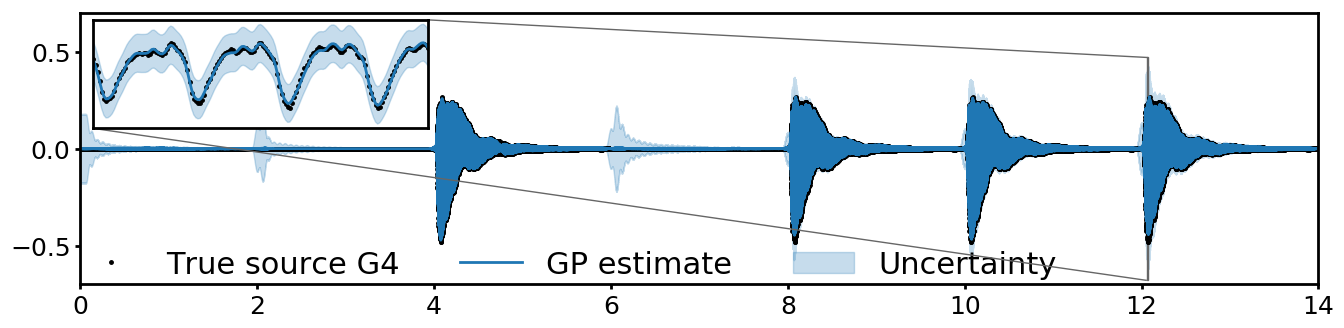

In [14]:
plot_zoom_in(model=m, source=2, loc=2, limits=[12.06, 12.07, -0.68, 0.47], width="27%", height="40%", loc_mark=[3, 1], 
             bbox_to_anchor=(0.005, 0.0, 1, 1), legend=True, source_number='G4', ylim=[-0.7, 0.7])
plt.tight_layout()
#plt.savefig('source_3.pdf')
plt.savefig('figures/source_3.png', dpi=500)

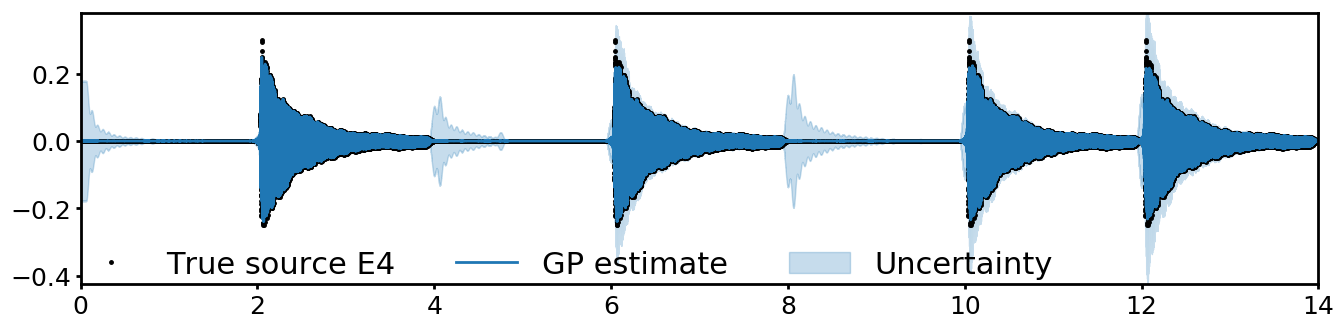

In [15]:
plot_zoom_in(model=m, source=1, loc=2, limits=[6.1, 6.11, -0.31, 0.31], width="24%", height="31%", loc_mark=[3, 1], 
             bbox_to_anchor=(0.175, 0., 1, 1), legend=True, plot_zoom_in=False, source_number='E4', ylim=[-0.425, 0.38])
plt.tight_layout()
#plt.savefig('source_2.pdf')
plt.savefig('figures/source_2.png', dpi=500)

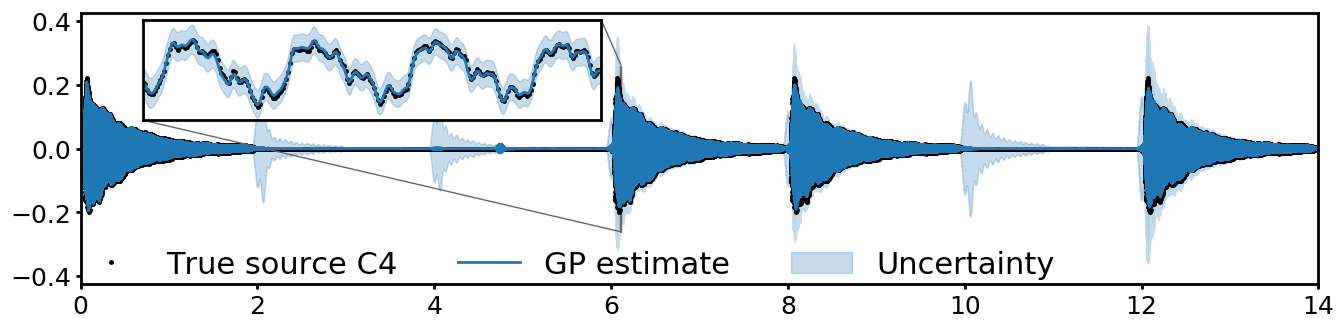

In [16]:
plot_zoom_in(model=m, source=0, loc=2, limits=[6.1, 6.115, -0.26, 0.26], width="37%", height="37%", loc_mark=[3, 1], 
             bbox_to_anchor=(0.045, 0., 1, 1), source_number='C4', ylim=[-0.425, 0.425])
plt.tight_layout()
#plt.savefig('source_1.pdf')
plt.savefig('figures/source_1.png',dpi=500)

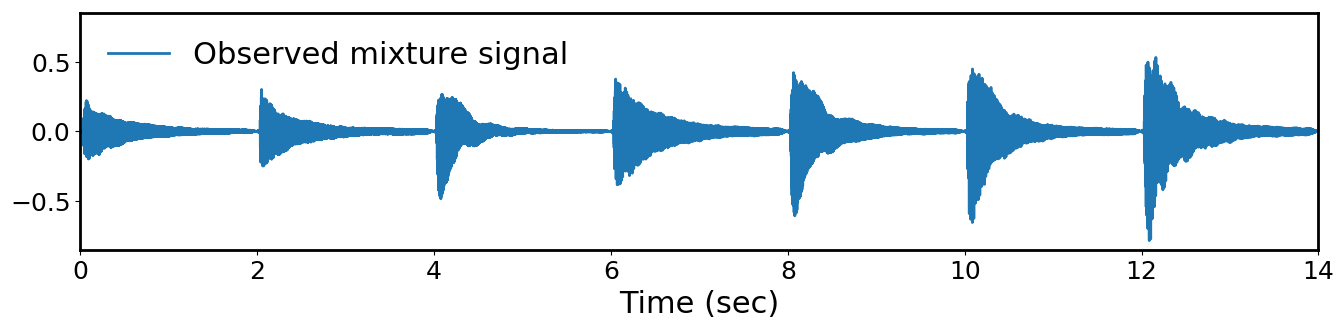

In [17]:
fonts = 22
plt.figure(figsize=(width, height))
plt.plot(m.test_data.x, m.test_data.y, lw=2)
plt.xlabel('Time (sec)', fontsize=fonts)
plt.xlim(0, 14)
plt.ylim(-0.85, 0.85)
plt.legend(['Observed mixture signal'], fontsize=fonts, frameon=False, loc=2);
plt.tight_layout()
#plt.savefig('mixture.pdf')
plt.savefig('figures/mixture.png', dpi=500)